In [166]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [181]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [168]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [169]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [170]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [171]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [172]:
predictions[0:5]

array([110.93753623,  93.20484871, 122.04555894, 182.62634366,
        95.59073512])

Text(0, 0.5, 'Predictions')

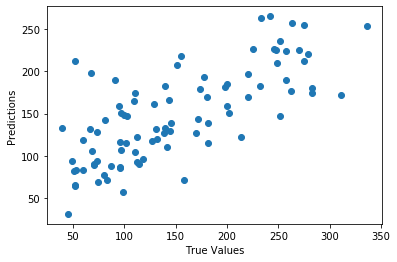

In [173]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [174]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 51.83292678764907
Train RMSE: 54.120194414657654


# Cross Validation

In [175]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [176]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [177]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


### LOOCV

In [178]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [179]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [182]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


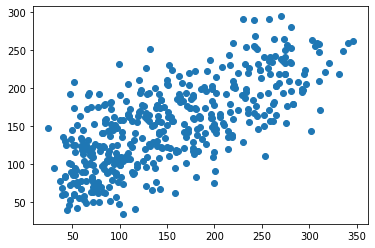

In [183]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

In [184]:
predictions

array([204.74116867,  66.83256782, 175.60492163, 165.82131555,
       128.83457511, 103.05913006,  77.50532134, 125.41897877,
       161.76534891, 209.5903942 ,  98.5866784 , 102.25391983,
       114.3072534 , 161.82165714, 100.50073703, 176.55193264,
       206.59118368, 184.3577636 , 147.82727722, 121.98438237,
       119.6409081 ,  89.72660898, 117.35311756, 251.99153125,
       164.01794205, 146.8714022 ,  95.41577967, 178.88367056,
       127.20395689, 179.54810126, 159.81822573,  67.84440925,
       259.65876453, 105.56967912,  78.43441365,  83.11721913,
       203.10947232, 154.06508322, 240.73979433, 137.18048859,
       158.32510156,  72.81647497, 145.48464826,  78.96090116,
       218.96414895, 125.73533137, 141.31322446, 107.95054173,
        72.54328656, 192.8483576 , 157.23952998, 171.00497069,
       134.05940748, 158.09263799, 139.09864269,  71.7115061 ,
       208.28948411,  77.67427519, 102.08430196, 135.69822265,
       113.420112  , 184.40319269,  61.37326553,  96.75

In [185]:
np.sqrt(mean_squared_error(y,predictions))

54.76342105528678

# tasks 

##### Find out cross validation results without using cross_val_predict

In [ ]:
# your code here

##### Implement cross validation without using sklearn at all

In [ ]:
# your code here

# Feature Scaling

In [187]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head() 

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [189]:
y = data['Value']

In [190]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [191]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [192]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [193]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [194]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.310345,0.531915,0.565217,0.285714
1,0.172414,0.510638,0.760870,0.071429
2,0.379310,0.574468,0.586957,0.091837
3,0.275862,0.404255,0.456522,0.193878
4,0.137931,0.468085,0.652174,0.132653
...,...,...,...,...
14320,0.448276,0.446809,0.456522,0.030612
14321,0.310345,0.765957,0.826087,0.214286
14322,0.137931,0.446809,0.586957,0.316327
14323,0.551724,0.468085,0.456522,0.132653


In [196]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.172414,0.382979,0.586957,0.275510
1,0.517241,0.404255,0.391304,0.091837
2,0.068966,0.297872,0.608696,0.204082
3,0.517241,0.361702,0.347826,0.051020
4,0.206897,0.680851,0.760870,0.061224
...,...,...,...,...
3577,0.172414,0.255319,0.456522,0.214286
3578,0.068966,0.255319,0.673913,0.265306
3579,0.137931,0.319149,0.565217,0.051020
3580,0.172414,0.553191,0.804348,0.061224


### Standard Scaler

In [197]:
from sklearn.preprocessing import StandardScaler

In [198]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [199]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,-0.024167,0.842276,0.443802,0.585061
1,-0.882684,0.696546,1.919573,-0.729694
2,0.405091,1.133737,0.607776,-0.604479
3,-0.238796,-0.032106,-0.376071,0.021595
4,-1.097313,0.405085,1.099700,-0.354050
...,...,...,...,...
14320,0.834349,0.259354,-0.376071,-0.980123
14321,-0.024167,2.445311,2.411497,0.146809
14322,-1.097313,0.259354,0.607776,0.772883
14323,1.478236,0.405085,-0.376071,-0.354050


In [200]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,-0.882684,-0.177837,0.607776,0.522454
1,1.263607,-0.032106,-0.867995,-0.604479
2,-1.526571,-0.760759,0.771751,0.084202
3,1.263607,-0.323567,-1.195944,-0.854909
4,-0.668054,1.862389,1.919573,-0.792301
...,...,...,...,...
3577,-0.882684,-1.052220,-0.376071,0.146809
3578,-1.526571,-1.052220,1.263675,0.459846
3579,-1.097313,-0.615028,0.443802,-0.854909
3580,-0.882684,0.988007,2.247522,-0.792301


# tasks

###### try applying this scalers to any dataset and check the regression results

In [ ]:
# your code here

# One Hot Encoding

In [201]:
data = pd.read_csv('regression.csv')

In [205]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [203]:
pd.get_dummies(data[['Age', 'Club']])

,Age,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,...,Club_Wycombe Wanderers,Club_Yeni Malatyaspor,Club_Yeovil Town,Club_Yokohama F. Marinos,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Çaykur Rizespor,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17904,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17905,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# tasks

###### try applying this scalers to any column(s) and check the regression results

In [ ]:
# your code here